Pymaceuticals Inc.
===============================================

Analysis:

To treat for SCC(Squamous Cell Carcinoma) different anti drug medications are used on mouse and see how this impacts the size of tumor.

For the mouse study, 10 different anti cancer medication is used. The highest number of study is treated by Capomulin. On the other hand, the lowest number of study is treated by Propriva. This means the study is more focused on Capomulin drug compared to other drug treatments.

For the study, there are more male mice treated 958 than female mice 922. However, the statistics shows only 2% difference. Gender might not be the significant variable to the study.




In [1]:
# dependancies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [27]:
# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
mousestudydatadf = pd.merge(mouse_metadata, study_results, on = "Mouse ID" , how = "outer")
mousestudydatadf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
#check the number of mice 
totalmice = len(mousestudydatadf['Mouse ID'].value_counts())
print("Total no of mice : ", totalmice)
249

Total no of mice :  249


249

In [4]:
# checking for mouse ID with duplicate time points
duplicatemice = mousestudydatadf.loc[mousestudydatadf.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicatemice

array(['g989'], dtype=object)

In [5]:
# Display the data mouse ID
duplicatemiceid_datadf = mousestudydatadf.loc[mousestudydatadf["Mouse ID"] == "g989"]
duplicatemiceid_datadf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# create new DF with removing duplicates 
cleandata_df = mousestudydatadf.drop(duplicatemiceid_datadf.index)
cleandata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# new df without duplicates
micecleandata = len(cleandata_df['Mouse ID'].value_counts())
print("Total no of mice without duplicates : ", micecleandata)


Total no of mice without duplicates :  248


Summary Statistics

In [31]:
# The mean of the tumor volume for each regimen is calculated using groupby
# Drug regimen in index column
drug_regimen = cleandata_df.groupby('Drug Regimen')
mean = drug_regimen['Tumor Volume (mm3)'].mean()
print(mean)


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


In [9]:
# The median of the tumor volume for each regimen is calculated using groupby
drug_regimen = cleandata_df.groupby('Drug Regimen')
median = drug_regimen['Tumor Volume (mm3)'].median()
print(median)


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [10]:
#The variance of the tumor volume for each regimen is calculated using groupby
drug_regimen = cleandata_df.groupby('Drug Regimen')
var = drug_regimen['Tumor Volume (mm3)'].var()
print(var)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64


In [11]:
# The standard deviation of the tumor volume for each regimen is calculated using groupby
drug_regimen = cleandata_df.groupby('Drug Regimen')
std_dev = drug_regimen['Tumor Volume (mm3)'].std()
print(std_dev)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [12]:
# The SEM of the tumor volume for each regimen is calculated using groupby
drug_regimen = cleandata_df.groupby('Drug Regimen')
sem = drug_regimen['Tumor Volume (mm3)'].sem()
print(sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [32]:
# Summary Statistics.
drug_regimen_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Std Dev': std_dev,
    'Tumor Volume Std. Err.': sem
})
drug_regimen_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

Number of Mice per Drug Regimen


In [33]:
# Create the first bar chart with the Pandas DataFrame.plot() method.
mice_per_regimendf = drug_regimen['Mouse ID'].count()
mpr = mice_per_regimendf.sort_values((0), ascending=False)
mpr

C:\Users\rupal\AppData\Local\Temp\ipykernel_10272\2294880527.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  mpr = mice_per_regimendf.sort_values((0), ascending=False)


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

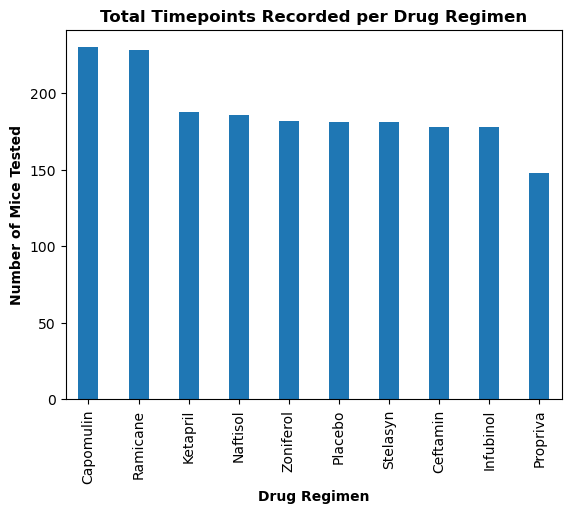

In [39]:
# Bar plot showing the total no of timepoints for all mice tested for each regimen using pandas
mice_per_regimen_graph1 = mpr.plot(kind='bar', width=0.4)

mice_per_regimen_graph1.set_title(label='Total Timepoints Recorded per Drug Regimen', fontweight = 'bold')
mice_per_regimen_graph1.set_xlabel('Drug Regimen', fontweight = 'bold')
mice_per_regimen_graph1.set_ylabel('Number of Mice Tested', fontweight = 'bold')

plt.show()

plt.close()

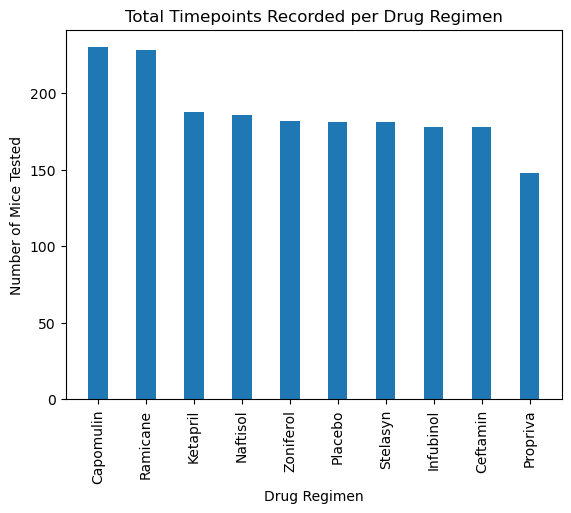

In [16]:
# Generate a bar plot showing the total no of timepoints for all mice tested for each drug regimen using pyplot.
counts =cleandata_df['Drug Regimen'].value_counts()

plt.bar(counts.index.values, counts.values, width=0.4)
plt.title('Total Timepoints Recorded per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested') 
plt.xticks(rotation=90)
plt.show()

The distribution of female versus male mice

In [17]:
gendermicecounts =cleandata_df['Sex'].value_counts()
gendermicecounts

Male      958
Female    922
Name: Sex, dtype: int64

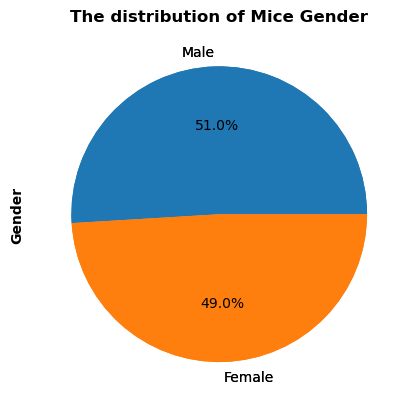

In [18]:
# Create the first pie chart with the Pandas
gendermicecounts.plot.pie()
mice_gender = gendermicecounts.plot(kind='pie', autopct='%1.1f%%')

mice_gender.set_title(label='The distribution of Mice Gender', fontweight = 'bold')
mice_gender.set_ylabel('Gender', fontweight = 'bold')

plt.show()

plt.close()

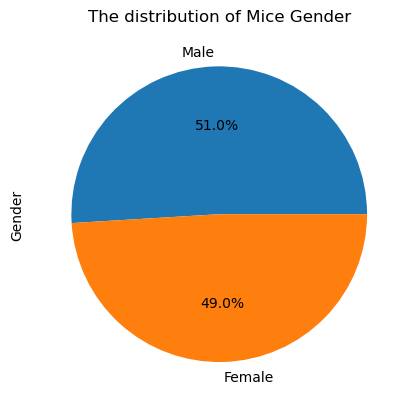

In [19]:
##Create the second pie chart with the Pyplot
counts =cleandata_df['Sex'].value_counts()

plt.pie(counts.values, labels=counts.index.values, autopct='%.1f%%')
plt.title('The distribution of Mice Gender')
plt.ylabel('Gender') 
plt.xticks(rotation=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# group drug regimen(Capomulin, Ramicane, Infubinol, and Ceftamin)
finaltumor_vol = cleandata_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
finaltumor_df = finaltumor_vol.reset_index()
finaltumor_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
finaltumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # find the rows which contain mice on each drug and get the tumor volumes
    finaltumor_vol = finaltumor_df.loc[finaltumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    finaltumor_vol_list.append(finaltumor_vol)
    
    # # Calculate the IQR and quantitatively
    quartiles = finaltumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = finaltumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = finaltumor_vol.loc[(finaltumor_vol < lower_bound) 
                  | (finaltumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} lower bounds {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} upper bounds {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print("Number of outliers for %s is: %d" % (drug, outliers.count()))
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')

Capomulin Regimen
Final tumor volume(mm3) for Capomulin lower bounds 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin upper bounds 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane lower bounds 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane upper bounds 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol lower bounds 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol upper bounds 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Re

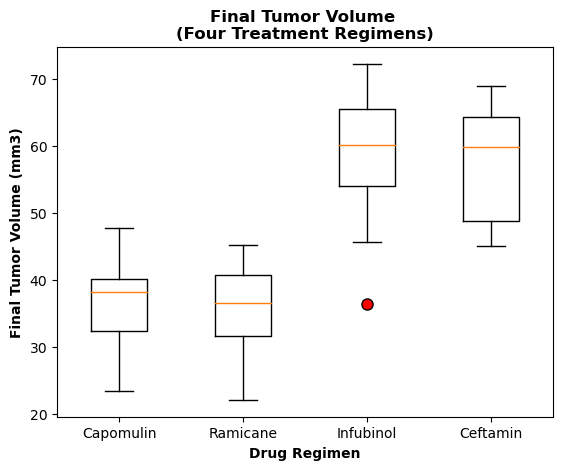

In [42]:
fig1, finaltumor_plot = plt.subplots()
finaltumor_plot.boxplot(finaltumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 8})

finaltumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
finaltumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
finaltumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

plt.show()

plt.close()

# Line and Scatter Plots

In [43]:
#df with Drug regimen Capomulin
miceCapomulin_treatment_df = cleandata_df.loc[cleandata_df['Drug Regimen'] == 'Capomulin']
miceCapomulin_treatment_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


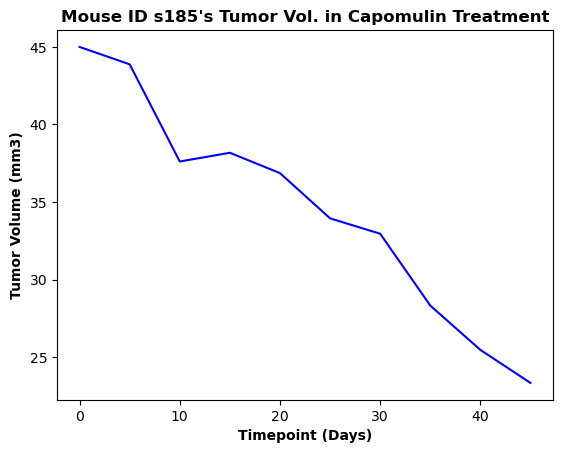

In [44]:
#select a mouse id with capomulin treatment 

mouse_id = 's185'

mouse_df = miceCapomulin_treatment_df.loc[miceCapomulin_treatment_df['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], color='Blue')

plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

plt.show()

plt.close()

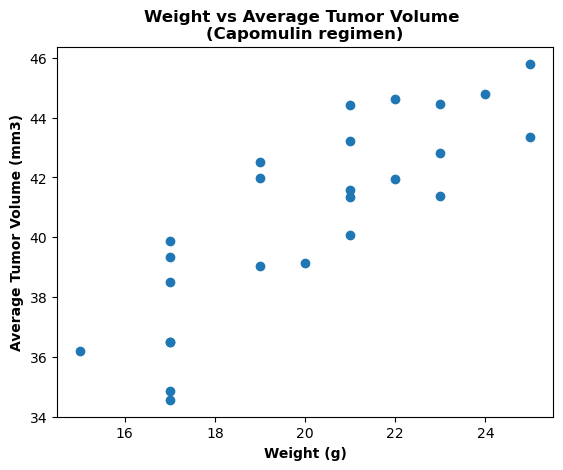

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
mouseid_weight = miceCapomulin_treatment_df.groupby('Mouse ID').mean()
miceweight_avg = mouseid_weight['Weight (g)']
micetumor_avg = mouseid_weight['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(miceweight_avg, micetumor_avg)

plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

plt.show()

plt.close()

Calculate Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84
 pvalue : 1.3225722434712404e-07


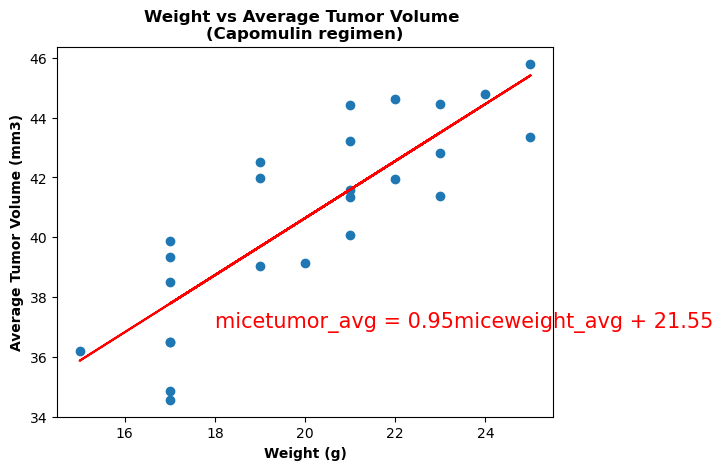

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(miceweight_avg, micetumor_avg)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(miceweight_avg, micetumor_avg)
regress_values = miceweight_avg * slope + intercept
#slopeequation = f'y= {slope}x + {intercept}' 
line_eq = "micetumor_avg = " + str(round(slope,2)) + "miceweight_avg + " + str(round(intercept,2))

plt.scatter(miceweight_avg, micetumor_avg)
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')
plt.plot(miceweight_avg,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
#plt.annotate(slopeequation,(18,37),fontsize=15,color="red")

print(f"The correlation between mouse weight and tumor vol is {correlation}")
print(" pvalue :", pvalue)

plt.show()

plt.close()